<a href="https://colab.research.google.com/github/robyng15/Boolean-Models/blob/master/Yeast_Cell_7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
file = open('yeast-cell.txt')
lines = file.readlines()

def list_gene_with_rule(locallines):
  length = len(locallines)
  keywds = ['or','and','not']
  gene_with_rule = []
  for i in range(length - 1):
    #print(lines[i+1])
    l = lines[i+1].strip('\n')
    gene_with_rule.append(l.split('\t'))
  return gene_with_rule
print(list_gene_with_rule(lines))

proteins = [item[0] for item in list_gene_with_rule(lines)]
rules = [item[1] for item in list_gene_with_rule(lines)]
#print(proteins)
#print(rules)

[['Cln3', '( )'], ['MBF', '( Cln3 not Clb1 )'], ['SBF', '( Cln3 not Clb1 )'], ['Cln1', '( SBF )'], ['Cdh1', '( Cdc20 not Cln1 or Clb5 or Clb1 )'], ['Swi5', '( Mcm1 or Cdc20 not Clb1 )'], ['Cdc20', '( Mcm1 or Clb1 )'], ['Clb5', '( MBF not Sic1 or Cdc20 )'], ['Sic1', '( Swi5 or Cdc20 not Cln1 or Clb5 or Clb1 )'], ['Clb1', '( Mcm1 or Clb5 not Cdc20 or Cdh1 or Sic1 )'], ['Mcm1', '( Clb5 or Clb1 )']]


In [70]:
# Function to return formula depending on protein_id
def get_formula(protein_id, lines):
  for rule in list_gene_with_rule(list(lines)):
    if protein_id == rule[0]:
      return(rule[1])
print(get_formula('Mcm1', list(lines)))

( Clb5 or Clb1 )


In [71]:
# Find activators and inhibitors
def find_activ_inhib(formula):
  #print(formula) 
  tokens = []
  inhibitors = []
  activators = []
  if formula == '( )':    
    return [activators, inhibitors]
  else:
    token = formula.split(' ')
    for i in token:
      if i != '(' and i != ')' and i != 'not' and i != 'or':
        tokens.append(i) 
    for i in range(len(tokens)):
      if 'not' in token:
        if token.index(tokens[i]) < token.index('not'):
          activators.append(tokens[i])
        if token.index(tokens[i]) > token.index('not'):
          inhibitors.append(tokens[i])
      if 'not' not in token:
        activators.append(tokens[i])
  return [activators, inhibitors]
      
print(find_activ_inhib(get_formula('Mcm1', list(lines))))

[['Clb5', 'Clb1'], []]


In [72]:
def find_original_rules(rules):
  f = list()
  for r in range(len(rules)):
    f.append(find_activ_inhib(rules[r]))
  return f

print(find_original_rules(rules))

[[[], []], [['Cln3'], ['Clb1']], [['Cln3'], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]]


In [73]:
# Inhibition and activation arrows are switched (29)
def perturb_edge_reverse(proteins, activ_inhib):
  reverse_formula = []
  # Perturbs edge reverse for activators one at a time
  for k in range(len(rules)):
    activators = find_activ_inhib(rules[k])[0]
    inhibitors = find_activ_inhib(rules[k])[1]
    #print([activators, inhibitors])
    new_activ = []
    new_inhib = []
    perturb_activ = activators.copy()
    perturb_inhib = inhibitors.copy()
    for i in range(len(activators)):
      #print(activators[i])
      if len(activators) != 0:
        perturb_inhib.append(activators[i])
        perturb_activ.remove(activators[i])
        reverse_formula.append([proteins[k], [perturb_activ, perturb_inhib]])
        perturb_activ = activators
        perturb_inhib = inhibitors
   
  # Perturbs edge reverse for inhibitors one at a time
  for k in range(len(rules)):
    activators = find_activ_inhib(rules[k])[0]
    inhibitors = find_activ_inhib(rules[k])[1]
  #print([activators, inhibitors])
    new_activ = []
    new_inhib = []
    perturb_activ = activators.copy()
    perturb_inhib = inhibitors.copy()
    for j in range(len(list(inhibitors))):
      #print(inhibitors)
      if len(inhibitors) != 0:
        perturb_activ.append(inhibitors[j])
        perturb_inhib.remove(inhibitors[j])
        reverse_formula.append([proteins[k], [perturb_activ, perturb_inhib]])
        perturb_activ = list(activators)
        perturb_inhib = list(inhibitors)
  return reverse_formula

print(perturb_edge_reverse(proteins, find_original_rules(rules)))
print(len(perturb_edge_reverse(proteins, find_original_rules(rules))))

[['MBF', [[], ['Clb1', 'Cln3']]], ['SBF', [[], ['Clb1', 'Cln3']]], ['Cln1', [[], ['SBF']]], ['Cdh1', [[], ['Cln1', 'Clb5', 'Clb1', 'Cdc20']]], ['Swi5', [['Cdc20'], ['Clb1', 'Mcm1']]], ['Swi5', [['Mcm1'], ['Clb1', 'Cdc20']]], ['Cdc20', [['Clb1'], ['Mcm1']]], ['Cdc20', [['Mcm1'], ['Clb1']]], ['Clb5', [[], ['Sic1', 'Cdc20', 'MBF']]], ['Sic1', [['Cdc20'], ['Cln1', 'Clb5', 'Clb1', 'Swi5']]], ['Sic1', [['Swi5'], ['Cln1', 'Clb5', 'Clb1', 'Cdc20']]], ['Clb1', [['Clb5'], ['Cdc20', 'Cdh1', 'Sic1', 'Mcm1']]], ['Clb1', [['Mcm1'], ['Cdc20', 'Cdh1', 'Sic1', 'Clb5']]], ['Mcm1', [['Clb1'], ['Clb5']]], ['Mcm1', [['Clb5'], ['Clb1']]], ['MBF', [['Cln3', 'Clb1'], []]], ['SBF', [['Cln3', 'Clb1'], []]], ['Cdh1', [['Cdc20', 'Cln1'], ['Clb5', 'Clb1']]], ['Cdh1', [['Cdc20', 'Clb5'], ['Cln1', 'Clb1']]], ['Cdh1', [['Cdc20', 'Clb1'], ['Cln1', 'Clb5']]], ['Swi5', [['Mcm1', 'Cdc20', 'Clb1'], []]], ['Clb5', [['MBF', 'Sic1'], ['Cdc20']]], ['Clb5', [['MBF', 'Cdc20'], ['Sic1']]], ['Sic1', [['Swi5', 'Cdc20', 'Cln1'], ['

In [74]:
import numpy as np
# Perturbation by adding an edge to activator/inhibitor list one at a time (174)
def perturb_edge_add(proteins, activ_inhib):
  added_formula = []
  # Goes through activators, adds one at a time
  for i in range(len(rules)):
    activators = find_activ_inhib(rules[i])[0]
    inhibitors = find_activ_inhib(rules[i])[1]
    #print([activators, inhibitors])
    perturb_activ = activators.copy()
    for k in range(len(proteins)):
      if proteins[k] not in activators and proteins[k] not in inhibitors and proteins[k] != proteins[i]:
        perturb_activ.append(proteins[k])
        #print(perturb_activ)
        added_formula.append([proteins[i], [perturb_activ, inhibitors]])
        #print(added_formula)
        perturb_activ = list(activators)
      else:
        pass
  # Goes through list of inhibitors, adds one at a time      
  for i in range(len(rules)):
    activators = find_activ_inhib(rules[i])[0]
    inhibitors = find_activ_inhib(rules[i])[1]        
    perturb_inhib = inhibitors.copy()
    for k in range(len(proteins)):
      if proteins[k] not in inhibitors and proteins[k] not in activators and proteins[k] != proteins[i]:
        perturb_inhib.append(proteins[k])
        #print(perturb_inhib)
        added_formula.append([proteins[i], [activators, perturb_inhib]])
        #print(added_formula)
        perturb_inhib = list(inhibitors)
      else:
        pass 
  return added_formula
  
f = list()
for r in range(len(rules)):
  f.append(find_activ_inhib(rules[r]))
#print(f)
  
print(perturb_edge_add(proteins, find_original_rules(rules)))
print(len(perturb_edge_add(proteins, find_original_rules(rules))))
#print(np.array(perturb_edge_add(proteins, find_original_rules(rules))))

[['Cln3', [['MBF'], []]], ['Cln3', [['SBF'], []]], ['Cln3', [['Cln1'], []]], ['Cln3', [['Cdh1'], []]], ['Cln3', [['Swi5'], []]], ['Cln3', [['Cdc20'], []]], ['Cln3', [['Clb5'], []]], ['Cln3', [['Sic1'], []]], ['Cln3', [['Clb1'], []]], ['Cln3', [['Mcm1'], []]], ['MBF', [['Cln3', 'SBF'], ['Clb1']]], ['MBF', [['Cln3', 'Cln1'], ['Clb1']]], ['MBF', [['Cln3', 'Cdh1'], ['Clb1']]], ['MBF', [['Cln3', 'Swi5'], ['Clb1']]], ['MBF', [['Cln3', 'Cdc20'], ['Clb1']]], ['MBF', [['Cln3', 'Clb5'], ['Clb1']]], ['MBF', [['Cln3', 'Sic1'], ['Clb1']]], ['MBF', [['Cln3', 'Mcm1'], ['Clb1']]], ['SBF', [['Cln3', 'MBF'], ['Clb1']]], ['SBF', [['Cln3', 'Cln1'], ['Clb1']]], ['SBF', [['Cln3', 'Cdh1'], ['Clb1']]], ['SBF', [['Cln3', 'Swi5'], ['Clb1']]], ['SBF', [['Cln3', 'Cdc20'], ['Clb1']]], ['SBF', [['Cln3', 'Clb5'], ['Clb1']]], ['SBF', [['Cln3', 'Sic1'], ['Clb1']]], ['SBF', [['Cln3', 'Mcm1'], ['Clb1']]], ['Cln1', [['SBF', 'Cln3'], []]], ['Cln1', [['SBF', 'MBF'], []]], ['Cln1', [['SBF', 'Cdh1'], []]], ['Cln1', [['SBF', 

In [75]:
import numpy as np
# Perturbation by removing an edge from activator/inhibitor list (34)
def perturb_edge_delete(proteins, activ_inhib):
  deleted_formula = []
  # Goes through list of activators, deletes one at a time
  for i in range(len(rules)):
    activators = find_activ_inhib(rules[i])[0]
    inhibitors = find_activ_inhib(rules[i])[1]
    #print([activators, inhibitors])
    perturb_activ = activators.copy()
    for k in range(len(proteins)):
      if proteins[k] in activators:
        perturb_activ.remove(proteins[k])
        deleted_formula.append([proteins[i], [perturb_activ, inhibitors]])
        #print(deleted_formula)
        perturb_activ = list(activators)
      else:
        pass
  # Goes through list of inhibitors, deletes one at a time        
  for i in range(len(rules)):
    activators = find_activ_inhib(rules[i])[0]
    inhibitors = find_activ_inhib(rules[i])[1]
    perturb_inhib = inhibitors.copy()
    for k in range(len(proteins)):
      if proteins[k] in inhibitors:
        perturb_inhib.remove(proteins[k])
        deleted_formula.append([proteins[i], [activators, perturb_inhib]])
        perturb_inhib = list(inhibitors)
      else:    
        pass   
  return deleted_formula
  
print(perturb_edge_delete(proteins, find_original_rules(rules)))
print(len(perturb_edge_delete(proteins, find_original_rules(rules))))
#print(np.array(perturb_edge_delete(proteins, find_original_rules(rules))))

[['MBF', [[], ['Clb1']]], ['SBF', [[], ['Clb1']]], ['Cln1', [[], []]], ['Cdh1', [[], ['Cln1', 'Clb5', 'Clb1']]], ['Swi5', [['Mcm1'], ['Clb1']]], ['Swi5', [['Cdc20'], ['Clb1']]], ['Cdc20', [['Mcm1'], []]], ['Cdc20', [['Clb1'], []]], ['Clb5', [[], ['Sic1', 'Cdc20']]], ['Sic1', [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']]], ['Sic1', [['Swi5'], ['Cln1', 'Clb5', 'Clb1']]], ['Clb1', [['Mcm1'], ['Cdc20', 'Cdh1', 'Sic1']]], ['Clb1', [['Clb5'], ['Cdc20', 'Cdh1', 'Sic1']]], ['Mcm1', [['Clb1'], []]], ['Mcm1', [['Clb5'], []]], ['MBF', [['Cln3'], []]], ['SBF', [['Cln3'], []]], ['Cdh1', [['Cdc20'], ['Clb5', 'Clb1']]], ['Cdh1', [['Cdc20'], ['Cln1', 'Clb1']]], ['Cdh1', [['Cdc20'], ['Cln1', 'Clb5']]], ['Swi5', [['Mcm1', 'Cdc20'], []]], ['Clb5', [['MBF'], ['Sic1']]], ['Clb5', [['MBF'], ['Cdc20']]], ['Sic1', [['Swi5', 'Cdc20'], ['Clb5', 'Clb1']]], ['Sic1', [['Swi5', 'Cdc20'], ['Cln1', 'Clb1']]], ['Sic1', [['Swi5', 'Cdc20'], ['Cln1', 'Clb5']]], ['Clb1', [['Mcm1', 'Clb5'], ['Cdc20', 'Sic1']]], ['Clb1', [['Mcm1', 

In [76]:
# Delete each protein at a time, set it to 0 (remove from activ and inhib)
def perturb_node_delete(proteins, activ_inhib):
  proteins_copy = proteins.copy()
  perturb_nodes = []
  #print(activ_inhib)
  
  for i in range(len(proteins)):
    #print(proteins[i])
    proteins_copy.remove(proteins[i])
    #print(proteins_copy)
    for j in range(len(activ_inhib)):
      activators = activ_inhib[j][0]
      inhibitors = activ_inhib[j][1]
      perturb_activ = activators.copy()
      perturb_inhib = inhibitors.copy()
      #print([activators, inhibitors])
      if proteins[i] in activators:
        perturb_activ.remove(proteins[i])
       #print(activators)
      if proteins[i] in inhibitors:
        perturb_inhib.remove(proteins[i])
          #print(inhibitors)
      #print([activators, inhibitors])
      perturb_nodes.append([proteins[i], [perturb_activ, perturb_inhib]])
      proteins_copy = list(proteins)
      perturb_activ = list(activators)
      perturb_inhib = list(inhibitors)
    
  return perturb_nodes
    
print(perturb_node_delete(proteins, find_original_rules(rules)))
#print(len(perturb_node_delete(proteins, find_original_rules(rules))))
#print(np.array(perturb_node_delete(proteins, find_original_rules(rules))))

[['Cln3', [[], []]], ['Cln3', [[], ['Clb1']]], ['Cln3', [[], ['Clb1']]], ['Cln3', [['SBF'], []]], ['Cln3', [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']]], ['Cln3', [['Mcm1', 'Cdc20'], ['Clb1']]], ['Cln3', [['Mcm1', 'Clb1'], []]], ['Cln3', [['MBF'], ['Sic1', 'Cdc20']]], ['Cln3', [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']]], ['Cln3', [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']]], ['Cln3', [['Clb5', 'Clb1'], []]], ['MBF', [[], []]], ['MBF', [['Cln3'], ['Clb1']]], ['MBF', [['Cln3'], ['Clb1']]], ['MBF', [['SBF'], []]], ['MBF', [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']]], ['MBF', [['Mcm1', 'Cdc20'], ['Clb1']]], ['MBF', [['Mcm1', 'Clb1'], []]], ['MBF', [[], ['Sic1', 'Cdc20']]], ['MBF', [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']]], ['MBF', [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']]], ['MBF', [['Clb5', 'Clb1'], []]], ['SBF', [[], []]], ['SBF', [['Cln3'], ['Clb1']]], ['SBF', [['Cln3'], ['Clb1']]], ['SBF', [[], []]], ['SBF', [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']]], ['SBF', [['Mcm1', 'Cdc20'], ['Clb1']]

In [77]:
def perturb_node_delete_zero(proteins):
  node_delete = []
  proteins_copy = proteins.copy()
  for i in range(len(proteins)):
    proteins_copy[proteins.index(proteins[i])] = 0
    node_delete.append([proteins[i], proteins_copy])
    proteins_copy = list(proteins)
  return node_delete

print(perturb_node_delete_zero(proteins))  
print(len(perturb_node_delete_zero(proteins)))

[['Cln3', [0, 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['MBF', ['Cln3', 0, 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['SBF', ['Cln3', 'MBF', 0, 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['Cln1', ['Cln3', 'MBF', 'SBF', 0, 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['Cdh1', ['Cln3', 'MBF', 'SBF', 'Cln1', 0, 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['Swi5', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 0, 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['Cdc20', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 0, 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['Clb5', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 0, 'Sic1', 'Clb1', 'Mcm1']], ['Sic1', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 0, 'Clb1', 'Mcm1']], ['Clb1', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 0, 'Mcm1']], ['Mcm1', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cd

In [78]:
def perturb_node_overexpress(proteins):
  node_overexpress = []
  proteins_copy = proteins.copy()
  for i in range(len(proteins)):
    proteins_copy[proteins.index(proteins[i])] = 1
    node_overexpress.append([proteins[i], proteins_copy])
    proteins_copy = list(proteins)
  return node_overexpress
  
print(perturb_node_overexpress(proteins))
print(len(perturb_node_overexpress(proteins)))

[['Cln3', [1, 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['MBF', ['Cln3', 1, 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['SBF', ['Cln3', 'MBF', 1, 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['Cln1', ['Cln3', 'MBF', 'SBF', 1, 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['Cdh1', ['Cln3', 'MBF', 'SBF', 'Cln1', 1, 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['Swi5', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 1, 'Cdc20', 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['Cdc20', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 1, 'Clb5', 'Sic1', 'Clb1', 'Mcm1']], ['Clb5', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 1, 'Sic1', 'Clb1', 'Mcm1']], ['Sic1', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 1, 'Clb1', 'Mcm1']], ['Clb1', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cdc20', 'Clb5', 'Sic1', 1, 'Mcm1']], ['Mcm1', ['Cln3', 'MBF', 'SBF', 'Cln1', 'Cdh1', 'Swi5', 'Cd

In [79]:
# Compute protein state for original model
def compute_protein_state(prot, net_state):
  for i in range(len(list_gene_with_rule(lines))):
    regs = [i[0] for i in list_gene_with_rule(lines)]
    if regs[i] == prot:
      formula = get_formula(list_gene_with_rule(lines)[i][0], list(lines))
      #print(find_activ_inhib(formula)[0])
      activators = find_activ_inhib(formula)[0]
      inhibitors = find_activ_inhib(formula)[1]
      #print([activators, inhibitors])
      break

  # Sets activators to 1 if on, and inhibitors to -1 if on
  for i in activators:
    if len(i) != 0:
      if net_state[proteins.index(i)] == 1:
        activators[activators.index(i)] = 1
      else:
        activators[activators.index(i)] = 0
    else:
      activators[activators.index(i)] = 0
  for i in inhibitors:
    if len(i) != 0:
      if net_state[proteins.index(i)] == 1:
        inhibitors[inhibitors.index(i)] = -1
      else:
        inhibitors[inhibitors.index(i)] = 0
    else:
      inhibitors[inhibitors.index(i)] = 0
  #print(inhibitors)

  # Finds sum of activators list and inhibitors list
  if len(activators) == 0:
    sum_activators = 0
  else:
    sum_activators = sum(activators)
  #print(sum_activators)
  if len(inhibitors) == 0:
    sum_inhibitors = 0
  else:
    sum_inhibitors = sum(inhibitors)
  #print(sum_inhibitors)

  # Find sum of activators list with inhibitors list to assign value for state
  final_count = sum_activators + sum_inhibitors
  #print(final_count)
  if final_count == 0 and (len(inhibitors) == 0 or prot == 'Swi5'):
    return 0
  if final_count > 0:
    return 1
  if final_count < 0:
    return 0
  if final_count == 0:
    index = regs.index(prot)
    #print(index)
    return net_state[index]
      
print(compute_protein_state('Clb5', [0,1,0,0,0,0,0,1,1,0,0]))

1


In [154]:
import numpy as np
# Find new rule for add edge
def find_new_rule_add(proteins, new_activ_inhib):
  new_list = []
  perturbed_activ_inhib = perturb_edge_add(proteins, find_original_rules(rules))
  #print(perturbed_activ_inhib)
  for i in range(len(proteins)):
    for j in range(len(perturbed_activ_inhib)):
      if proteins[i] in perturbed_activ_inhib[j][0]:
        new_list.append([proteins[i], perturbed_activ_inhib[j][1]])
  return new_list

print(find_new_rule_add(proteins, perturb_edge_add(proteins, f)))

[['Cln3', [['MBF'], []]], ['Cln3', [['SBF'], []]], ['Cln3', [['Cln1'], []]], ['Cln3', [['Cdh1'], []]], ['Cln3', [['Swi5'], []]], ['Cln3', [['Cdc20'], []]], ['Cln3', [['Clb5'], []]], ['Cln3', [['Sic1'], []]], ['Cln3', [['Clb1'], []]], ['Cln3', [['Mcm1'], []]], ['Cln3', [[], ['MBF']]], ['Cln3', [[], ['SBF']]], ['Cln3', [[], ['Cln1']]], ['Cln3', [[], ['Cdh1']]], ['Cln3', [[], ['Swi5']]], ['Cln3', [[], ['Cdc20']]], ['Cln3', [[], ['Clb5']]], ['Cln3', [[], ['Sic1']]], ['Cln3', [[], ['Clb1']]], ['Cln3', [[], ['Mcm1']]], ['MBF', [['Cln3', 'SBF'], ['Clb1']]], ['MBF', [['Cln3', 'Cln1'], ['Clb1']]], ['MBF', [['Cln3', 'Cdh1'], ['Clb1']]], ['MBF', [['Cln3', 'Swi5'], ['Clb1']]], ['MBF', [['Cln3', 'Cdc20'], ['Clb1']]], ['MBF', [['Cln3', 'Clb5'], ['Clb1']]], ['MBF', [['Cln3', 'Sic1'], ['Clb1']]], ['MBF', [['Cln3', 'Mcm1'], ['Clb1']]], ['MBF', [['Cln3'], ['Clb1', 'SBF']]], ['MBF', [['Cln3'], ['Clb1', 'Cln1']]], ['MBF', [['Cln3'], ['Clb1', 'Cdh1']]], ['MBF', [['Cln3'], ['Clb1', 'Swi5']]], ['MBF', [['Cln

In [52]:
# def perturb_rules_add(perturbed_rule, activ_inhib):
#   perturbed_rules = perturb_edge_add(proteins, find_original_rules(rules))
#   activ_inhib_copy = activ_inhib.copy()
#   #print(activ_inhib_copy)
#   perturb_rules_add = []
  
#   for i in range(len(perturbed_rules)):
#     #print(perturbed_rules[i])
#     #print(perturbed_rules[i][0])
#     index = proteins.index(perturbed_rules[i][0])
#     #print(index)
#     #print(activ_inhib_copy[index])
#     activ_inhib_copy[index] = perturbed_rules[i][1]
#     #print(activ_inhib_copy)
#     perturb_rules_add.append([perturbed_rules[i][0], activ_inhib_copy])
#     activ_inhib_copy = list(activ_inhib)
#     #print(activ_inhib_copy)
#   return perturb_rules_add

# print(perturb_rules_add(perturb_edge_add(proteins, find_original_rules(rules)), find_original_rules(rules)))

[['Cln3', [[['MBF'], []], [['Cln3'], ['Clb1']], [['Cln3'], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]]], ['Cln3', [[['SBF'], []], [['Cln3'], ['Clb1']], [['Cln3'], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]]], ['Cln3', [[['Cln1'], []], [['Cln3'], ['Clb1']], [['Cln3'], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]]], ['Cln3', [[['C

In [108]:
import numpy as np
# Find new rule for delete edge
def find_new_rule_delete(proteins, new_activ_inhib):
  new_list = []
  perturbed_activ_inhib = perturb_edge_delete(proteins, find_original_rules(rules))
  #print(perturbed_activ_inhib)
  for i in range(len(proteins)):
    for j in range(len(perturbed_activ_inhib)):
      if proteins[i] in perturbed_activ_inhib[j][0]: 
        new_list.append([proteins[i], perturbed_activ_inhib[j][1]])
  return new_list
  
print(find_new_rule_delete(proteins, perturb_edge_delete(proteins, f)))   


# #create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_delete(proteins, perturb_edge_delete(proteins, find_original_rules(rules))))
# delete = compute_perturb_network(create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_delete(proteins, perturb_edge_delete(proteins, find_original_rules(rules)))))
# #print(delete)

[['MBF', [[], ['Clb1']]], ['MBF', [['Cln3'], []]], ['SBF', [[], ['Clb1']]], ['SBF', [['Cln3'], []]], ['Cln1', [[], []]], ['Cdh1', [[], ['Cln1', 'Clb5', 'Clb1']]], ['Cdh1', [['Cdc20'], ['Clb5', 'Clb1']]], ['Cdh1', [['Cdc20'], ['Cln1', 'Clb1']]], ['Cdh1', [['Cdc20'], ['Cln1', 'Clb5']]], ['Swi5', [['Mcm1'], ['Clb1']]], ['Swi5', [['Cdc20'], ['Clb1']]], ['Swi5', [['Mcm1', 'Cdc20'], []]], ['Cdc20', [['Mcm1'], []]], ['Cdc20', [['Clb1'], []]], ['Clb5', [[], ['Sic1', 'Cdc20']]], ['Clb5', [['MBF'], ['Sic1']]], ['Clb5', [['MBF'], ['Cdc20']]], ['Sic1', [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']]], ['Sic1', [['Swi5'], ['Cln1', 'Clb5', 'Clb1']]], ['Sic1', [['Swi5', 'Cdc20'], ['Clb5', 'Clb1']]], ['Sic1', [['Swi5', 'Cdc20'], ['Cln1', 'Clb1']]], ['Sic1', [['Swi5', 'Cdc20'], ['Cln1', 'Clb5']]], ['Clb1', [['Mcm1'], ['Cdc20', 'Cdh1', 'Sic1']]], ['Clb1', [['Clb5'], ['Cdc20', 'Cdh1', 'Sic1']]], ['Clb1', [['Mcm1', 'Clb5'], ['Cdc20', 'Sic1']]], ['Clb1', [['Mcm1', 'Clb5'], ['Cdh1', 'Sic1']]], ['Clb1', [['Mcm1', 'Clb

In [109]:
# Find new rule for reverse edge
def find_new_rule_reverse(proteins, new_activ_inhib):
  new_list = []
  perturbed_activ_inhib = perturb_edge_reverse(proteins, find_original_rules(rules))
  #print(perturbed_activ_inhib)
  for i in range(len(proteins)):
    for j in range(len(perturbed_activ_inhib)):
      if proteins[i] in perturbed_activ_inhib[j][0]: 
        new_list.append([proteins[i], perturbed_activ_inhib[j][1]])
  return new_list
  
print(find_new_rule_reverse(proteins, perturb_edge_reverse(proteins, f)))  

[['MBF', [[], ['Clb1', 'Cln3']]], ['MBF', [['Cln3', 'Clb1'], []]], ['SBF', [[], ['Clb1', 'Cln3']]], ['SBF', [['Cln3', 'Clb1'], []]], ['Cln1', [[], ['SBF']]], ['Cdh1', [[], ['Cln1', 'Clb5', 'Clb1', 'Cdc20']]], ['Cdh1', [['Cdc20', 'Cln1'], ['Clb5', 'Clb1']]], ['Cdh1', [['Cdc20', 'Clb5'], ['Cln1', 'Clb1']]], ['Cdh1', [['Cdc20', 'Clb1'], ['Cln1', 'Clb5']]], ['Swi5', [['Cdc20'], ['Clb1', 'Mcm1']]], ['Swi5', [['Mcm1'], ['Clb1', 'Cdc20']]], ['Swi5', [['Mcm1', 'Cdc20', 'Clb1'], []]], ['Cdc20', [['Clb1'], ['Mcm1']]], ['Cdc20', [['Mcm1'], ['Clb1']]], ['Clb5', [[], ['Sic1', 'Cdc20', 'MBF']]], ['Clb5', [['MBF', 'Sic1'], ['Cdc20']]], ['Clb5', [['MBF', 'Cdc20'], ['Sic1']]], ['Sic1', [['Cdc20'], ['Cln1', 'Clb5', 'Clb1', 'Swi5']]], ['Sic1', [['Swi5'], ['Cln1', 'Clb5', 'Clb1', 'Cdc20']]], ['Sic1', [['Swi5', 'Cdc20', 'Cln1'], ['Clb5', 'Clb1']]], ['Sic1', [['Swi5', 'Cdc20', 'Clb5'], ['Cln1', 'Clb1']]], ['Sic1', [['Swi5', 'Cdc20', 'Clb1'], ['Cln1', 'Clb5']]], ['Clb1', [['Clb5'], ['Cdc20', 'Cdh1', 'Sic1', 

In [253]:
# Creates list of proteins with new rules (perturbed)

# Take in gene_with_rule, find this protein, change its rule
# original list: activators and inhibitors of unperturbed list (PARSED)
# list_of_changes,: list of new rules for each possible change
def create_new_gene_with_rule_list(original_list, list_of_changes):
  regs = [r[0] for r in list_gene_with_rule(lines)]
  all_new_lists = list()
  #for new_rule in find_new_rule_add(proteins, perturb_edge_add(proteins, find_original_rules(rules))):
  for new_rule in find_new_rule_delete(proteins, perturb_edge_delete(proteins, find_original_rules(rules))):
  #for new_rule in find_new_rule_reverse(proteins, perturb_edge_reverse(proteins, find_original_rules(rules))):
    #print(new_rule)
    hold_list = list(original_list)
    index = regs.index(new_rule[0])
    hold_list[index] = new_rule[1]
    all_new_lists.append(hold_list)
  return all_new_lists

#print(create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_add(proteins, perturb_edge_add(proteins, find_original_rules(rules)))))
print(create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_delete(proteins, perturb_edge_delete(proteins, find_original_rules(rules)))))

[[[[], []], [[], ['Clb1']], [['Cln3'], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]], [[[], []], [['Cln3'], []], [['Cln3'], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]], [[[], []], [['Cln3'], ['Clb1']], [[], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]], [[[], []], [['Cln3'], ['Clb1']], [['Cln3'], []], [['SBF'], []], [['Cdc20'], ['

In [0]:
# import numpy as np
# def perturb_rules_delete(perturbed_rule, activ_inhib):
# #def perturb_rules_add(perturbed_rule, activ_inhib):
#   perturbed_rules = perturb_edge_delete(proteins, find_original_rules(rules))
#   #perturbed_rules = perturb_edge_add(proteins, find_original_rules(rules))
#   activ_inhib_copy = activ_inhib.copy()
#   #print(activ_inhib_copy)
#   perturb_rules_delete = []
  
#   for i in range(len(perturbed_rules)):
#     #print(perturbed_rules[i])
#     #print(perturbed_rules[i][0])
#     index = proteins.index(perturbed_rules[i][0])
#     #print(index)
#     #print(activ_inhib_copy[index])
#     activ_inhib_copy[index] = perturbed_rules[i][1]
#     #print(activ_inhib_copy)
#     perturb_rules_delete.append([perturbed_rules[i][0], activ_inhib_copy])
#     activ_inhib_copy = list(activ_inhib)
#     #print(activ_inhib_copy)
#   return perturb_rules_delete

# print(perturb_rules_delete(perturb_edge_delete(proteins, find_original_rules(rules)), find_original_rules(rules)))
# #print(perturb_rules_add(perturb_edge_add(proteins, f), f))

[['MBF', [[[], []], [[], ['Clb1']], [['Cln3'], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]]], ['SBF', [[[], []], [['Cln3'], ['Clb1']], [[], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]]], ['Cln1', [[[], []], [['Cln3'], ['Clb1']], [['Cln3'], ['Clb1']], [[], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]]], ['Cdh1', [[[], []], [['Cln3'], ['Clb1']], [['Cln3

In [422]:
def compute_protein_state_perturb(gene_with_rule, perturbed_rules, prot, net_state):
  regs = [i[0] for i in gene_with_rule]
  targs = [i[1] for i in gene_with_rule]
  target = targs[regs.index(prot)]
  activs_inhibs = find_activ_inhib(target)
  #print(activs_inhibs)

  for i in range(len(perturbed_rules)):
    #print(len(perturbed_rules[i]))
    for j in range(len(perturbed_rules[i])):
      #print(perturbed_rules[i][j])
      if regs[j] == prot:
        if len(perturbed_rules[i][j][0]) != 0:
          activators = perturbed_rules[i][j][0]
        else:
          activators = []
        if len(perturbed_rules[i][j][1]) != 0:
          inhibitors = perturbed_rules[i][j][1]
        else:
          inhibitors = []
        
        
        #print([activators, inhibitors])
        num_acts = 0
        num_inhibs = 0

# #   # Sets activators to 1 if on, and inhibitors to -1 if on
        for act in activators:
          if len(activators) != 0:
            if net_state[proteins.index(act)] == 1:
              num_acts += 1
            else:
              num_acts +=  0
          else:
            num_acts += 0
        for inhib in inhibitors:
          if len(inhibitors) != 0:
            if net_state[proteins.index(inhib)] == 1:
              num_inhibs += -1
            else:
              num_inhibs += 0
          else:
            num_inhibs += 0
        #print(inhibitors)

#         # Finds sum of activators list and inhibitors list
#         if len(activators) == 0:
#           sum_activators = 0
#         else:
#           sum_activators = sum(activators)
#         #print(sum_activators)
#         if len(inhibitors) == 0:
#           sum_inhibitors = 0
#         else:
#           sum_inhibitors = sum(inhibitors)

        #print([sum_activators, sum_inhibitors])
        #activ_inhib_copy = list(activ_inhib)

        #Find sum of activators list with inhibitors list to assign value for state
        #final_count = sum_activators + sum_inhibitors
        final_count = num_acts + num_inhibs
        #print(final_count)
        if final_count == 0 and (len(inhibitors) == 0 or prot == 'Swi5'):
          return 0
        if final_count > 0:
          return 1
        if final_count < 0:
          return 0
        if final_count == 0:
          index = regs.index(prot)
          return net_state[index]

        if len(perturbed_rule) == 0:
          activators = []
          inhibitors = []
          sum_activators = 0
          sum_inhibitors = 0 
          final_count = sum_activators + sum_inhibitors
          if final_count == 0 and len(inhibitors) == 0:
            return 0
          

# Delete edges
print(compute_protein_state_perturb(list_gene_with_rule(lines), create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_delete(proteins, perturb_edge_delete(proteins, find_original_rules(rules)))), 'MBF', [1,1,0,0,0,0,0,0,0,1,0])) 

0


In [423]:
def compute_next_protein_state_synchronous(gene_with_new_rule, net_state):
  next_state_list = list(net_state)
  #print(gene_with_new_rule)
  prot = [i[0] for i in list_gene_with_rule(lines)]
  #print(prot)
  #print(proteins)
  for i in range(len(proteins)):
    new_state_value = compute_protein_state_perturb(list_gene_with_rule(lines), gene_with_new_rule, prot[i], net_state)
    #print(new_state_value)
    next_state_list[i] = new_state_value
  return next_state_list

#print(compute_next_protein_state_synchronous(create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_add(proteins, perturb_edge_add(proteins, find_original_rules(rules)))), [1,1,0,0,0,0,0,0,0,0,0]))#list_gene_with_rule(lines), [1,1,0,0,0,0,0,0,1,0,0]))
print(compute_next_protein_state_synchronous(create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_delete(proteins, perturb_edge_delete(proteins, find_original_rules(rules)))), [1,1,0,0,0,0,0,0,0,0,0]))#find_new_rule_delete(proteins, perturb_edge_delete(proteins, find_original_rules(rules))), [1,1,0,0,0,0,0,0,0,0,0]))
#print(compute_next_protein_state_synchronous(create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_reverse(proteins, perturb_edge_reverse(proteins, find_original_rules(rules)))), [1,1,0,0,0,0,0,0,0,0,0]))

[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]


In [424]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

def compute_state_space_network_synchronous(gene_with_new_rule):
  all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  start_state = all_states[0]
  edgelist = []
  for start_state in all_states:
    #print(start_state)
    next_state_space = compute_next_protein_state_synchronous(gene_with_new_rule, start_state)
    #print(next_state_space)
    edgelist.append((start_state, next_state_space))
    #print(edgelist)
  return edgelist

#output_add = compute_state_space_network_synchronous(find_new_rule_add(proteins, perturb_edge_add(proteins, find_original_rules(rules))))
output_delete = compute_state_space_network_synchronous(create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_delete(proteins, perturb_edge_delete(proteins, find_original_rules(rules)))))
print(output_delete)
print(len(output_delete))
#output_reverse = compute_state_space_network_synchronous(find_new_rule_reverse(proteins, perturb_edge_reverse(proteins, find_original_rules(rules))))

[([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 0, 1, 1, 0, 0,

In [425]:
def compute_perturb_network(list_of_networks_w_change):
  networks = []
  print(list_of_networks_w_change)
  for network in list_of_networks_w_change:
    print(network)
    networks.append(compute_state_space_network_synchronous(network))
  return networks

#add = compute_perturb_network(create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_add(proteins, perturb_edge_add(proteins, find_original_rules(rules)))))
delete = compute_perturb_network(create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_delete(proteins, perturb_edge_delete(proteins, find_original_rules(rules)))))
#reverse = compute_perturb_network(create_new_gene_with_rule_list(find_original_rules(rules), find_new_rule_reverse(proteins, perturb_edge_reverse(proteins, find_original_rules(rules)))))

[[[[], []], [[], ['Clb1']], [['Cln3'], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]], [[[], []], [['Cln3'], []], [['Cln3'], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]], [[[], []], [['Cln3'], ['Clb1']], [[], ['Clb1']], [['SBF'], []], [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Cdc20'], ['Clb1']], [['Mcm1', 'Clb1'], []], [['MBF'], ['Sic1', 'Cdc20']], [['Swi5', 'Cdc20'], ['Cln1', 'Clb5', 'Clb1']], [['Mcm1', 'Clb5'], ['Cdc20', 'Cdh1', 'Sic1']], [['Clb5', 'Clb1'], []]], [[[], []], [['Cln3'], ['Clb1']], [['Cln3'], []], [['SBF'], []], [['Cdc20'], ['

IndexError: ignored

In [162]:
# Edgelist perturb add
all_edges_add = []
for i in range(len(add)):
  edge_add = []
  for state in add[i]:
    edge_add.append((''.join([str(x) for x in state[0]]), 
                      ''.join([str(x) for x in state[1]])))    
  all_edges_add.append(edge_add)
#print(all_edges_add)
#print(len(all_edges_add))

print(all_edges_add[0] == all_edges_add[1])

True


In [115]:
# Edgelist perturb delete
all_edges_delete = []
for i in range(len(delete)):
  edge_delete = []
  for state in delete[i]:
    edge_delete.append((''.join([str(x) for x in state[0]]), 
                      ''.join([str(x) for x in state[1]])))    
  all_edges_delete.append(edge_delete)
print(all_edges_delete)
print(len(all_edges_delete))

#print(all_edges_delete[0] == all_edges_delete[1])

[[('00000000000', '00000000000'), ('00000000001', '00000110010'), ('00000000010', '00000010011'), ('00000000011', '00000010011'), ('00000000100', '00000000100'), ('00000000101', '00000110100'), ('00000000110', '00000010001'), ('00000000111', '00000010011'), ('00000001000', '00000001011'), ('00000001001', '00000111011'), ('00000001010', '00000011011'), ('00000001011', '00000011011'), ('00000001100', '00000000001'), ('00000001101', '00000110011'), ('00000001110', '00000010011'), ('00000001111', '00000010011'), ('00000010000', '00001100100'), ('00000010001', '00001110100'), ('00000010010', '00000010001'), ('00000010011', '00000110011'), ('00000010100', '00001100100'), ('00000010101', '00001110100'), ('00000010110', '00000010101'), ('00000010111', '00000110101'), ('00000011000', '00000100001'), ('00000011001', '00000110011'), ('00000011010', '00000010011'), ('00000011011', '00000110011'), ('00000011100', '00000100101'), ('00000011101', '00000110101'), ('00000011110', '00000010001'), ('0000

In [0]:
# Edgelist perturb reverse
all_edges_reverse = []
for i in range(len(reverse)):
  edge_reverse = []
  for state in reverse[i]:
    edge_reverse.append((''.join([str(x) for x in state[0]]), 
                      ''.join([str(x) for x in state[1]])))    
  all_edges_reverse.append(edge_reverse)
print(all_edges_reverse)
print(len(all_edges_reverse))

#print(all_edges_reverse[0] == all_edges_reverse[1])

In [0]:
# def compute_perturb_delete(perturbed_rule, activ_inhib):#, net_state):
#   #print(activ_inhib)
#   activ_inhib_copy = activ_inhib.copy()
#   #print(activ_inhib_copy)
#   perturbed_network = []
#   #print(perturbed_rule)
#   prot = [i[0] for i in list_gene_with_rule(lines)]
#   #print(list_gene_with_rule(lines))
#   gene_new_rule = find_new_rule_delete(proteins, perturb_edge_delete(proteins, find_original_rules(rules)))
  
#   for i in range(len(perturbed_rule)):
#     activ_inhib_copy[0] = perturbed_rule[perturbed_rule.index(perturbed_rule[i])]
#     #print(activ_inhib_copy)
#     #print(perturbed_rule[i][1])
#     #print(proteins.index(perturbed_rule[i][0]))
#     #print(perturbed_rule[i][1][proteins.index(perturbed_rule[i][0])])
#     #print(activ_inhib_copy)
#     for j in range(len(proteins)):
#       activators = perturbed_rule[i][1][j][0]
#       inhibitors = perturbed_rule[i][1][j][1]
#       #print([activators, inhibitors])
#       #next_state = compute_next_protein_state_synchronous(list_gene_with_rule(lines), net_state)
#       #print(next_state)
#     network = compute_state_space_network_synchronous(gene_new_rule)#, net_state)#list_gene_with_rule(lines), net_state)
#     #print(network)
#     perturbed_network.append([perturbed_rule[i][0], perturbed_rule[i][1][proteins.index(perturbed_rule[i][0])], network]) #[perturbed_rule[perturbed_rule.index(perturbed_rule[i])], network])
#     active_inhib_copy = list(activ_inhib)
#   return perturbed_network
    

# out_delete = compute_perturb_delete(perturb_rules_delete(perturb_edge_delete(proteins, find_original_rules(rules)), find_original_rules(rules)), find_original_rules(rules))#, [1,1,0,0,0,0,0,0,0,0,0,0])
# #print(out_delete)
# for i in range(len(out_delete) - 2):
#   print((compute_state_space_network_synchronous(out_delete[i][2]) == compute_state_space_network_synchronous(out_delete[i + 1][2])))

In [0]:
# def compute_perturb_add(perturbed_rule, activ_inhib, net_state):
#   #perturbed_rules = perturb_edge_delete(proteins, f)
#   perturbed_rules = perturb_edge_add(proteins, find_original_rules(rules))
#   activ_inhib_copy = activ_inhib.copy()
#   #print(activ_inhib_copy)
#   perturbed_network = []
  
  
#   for i in range(len(perturbed_rule)):
#     activ_inhib_copy[0] = perturbed_rule[perturbed_rule.index(perturbed_rule[i])]
# #     print(perturbed_rule[i][0])
# #     print(proteins.index(perturbed_rule[i][0]))
# #     print(perturbed_rule[i][1][proteins.index(perturbed_rule[i][0])])
#       #print(activ_inhib_copy)
#     for j in range(len(proteins)):
#       activators = perturbed_rule[i][1][j][0]
#       inhibitors = perturbed_rule[i][1][j][1]
#       #print([activators, inhibitors])
#       #next_state = compute_next_protein_state_synchronous(list_gene_with_rule(lines), [0,0,0,1,0,1,1,1,1,0,0], lines)
#       #print(next_state)
#     network = compute_state_space_network_synchronous(list_gene_with_rule(lines), [0,0,0,0,0,0,0,0,0,0,0])
#     #print(network)
#     perturbed_network.append([perturbed_rule[perturbed_rule.index(perturbed_rule[i])], network])
#     activ_inhib_copy = list(activ_inhib)
#   return perturbed_network
    
    
# #print(compute_perturb(perturb_edge_delete(proteins, f), f, [0,0,0,0,0,0,0,0,0,0,0]))
# out_add = compute_perturb_add(perturb_edge_add(proteins, find_original_rules(rules)), find_original_rules(rules), [0,0,0,0,0,0,0,0,0,0,0])
# #print(out_add)

In [0]:
# Protein state async
def compute_next_protein_state_asynchronous(gene_with_rule, net_state):
  next_state_list = []
  prot = [i[0] for i in gene_with_rule]
  for i in gene_with_rule:
    next_state_list.append([i[0], list(net_state)])
  #print(next_state_list)
  for j in range(len(next_state_list)):
    #print(next_state_list[j][1][i])
    next_state_list[j][1][j] = compute_protein_state(prot[j], net_state)
  return next_state_list

print(compute_next_protein_state_asynchronous(list_gene_with_rule(lines), [1,0,0,0,0,0,0,0,0,0,0]))

[['Cln3', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], ['MBF', [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], ['SBF', [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], ['Cln1', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], ['Cdh1', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], ['Swi5', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], ['Cdc20', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], ['Clb5', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], ['Sic1', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], ['Clb1', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], ['Mcm1', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]


In [0]:
def compute_state_space_network_asynchronous(gene_with_rule, net_state):
  all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  start_state = all_states[0]
  used_states = all_states[0]
  edgelist = []
  for start_state in all_states:
    next_state_space = compute_next_protein_state_asynchronous(gene_with_rule, 
                                                              start_state)
    for i in range(len(next_state_space)):
      if next_state_space[i][1] not in edgelist:
        edgelist.append([start_state, next_state_space[i][1]])
  return edgelist

output_a = compute_state_space_network_asynchronous(list_gene_with_rule(lines), [0,0,0,0,0,0,0,0,0,0,0])
print(output_a)
print(len(output_a))

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0,

[('00000000000', '00000000000'), ('00000000001', '00000110010'), ('00000000010', '00000010011'), ('00000000011', '00000010011'), ('00000000100', '00000000100'), ('00000000101', '00000110100'), ('00000000110', '00000010001'), ('00000000111', '00000010011'), ('00000001000', '00000001011'), ('00000001001', '00000111011'), ('00000001010', '00000011011'), ('00000001011', '00000011011'), ('00000001100', '00000000001'), ('00000001101', '00000110011'), ('00000001110', '00000010011'), ('00000001111', '00000010011'), ('00000010000', '00001100100'), ('00000010001', '00001110100'), ('00000010010', '00000010001'), ('00000010011', '00000110011'), ('00000010100', '00001100100'), ('00000010101', '00001110100'), ('00000010110', '00000010101'), ('00000010111', '00000110101'), ('00000011000', '00000100001'), ('00000011001', '00000110011'), ('00000011010', '00000010011'), ('00000011011', '00000110011'), ('00000011100', '00000100101'), ('00000011101', '00000110101'), ('00000011110', '00000010001'), ('00000

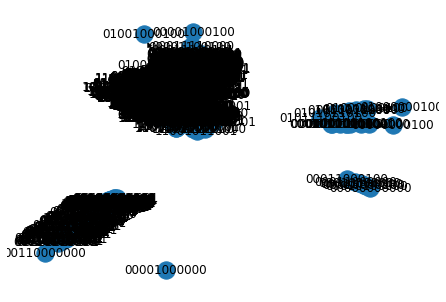

In [86]:
# Edgelist for unperturbed Sync
edgelist = []
for seq in output:
  sequence = seq
  edgelist.append((''.join([str(st) for st in seq[0]]),
                   ''.join([str(st) for st in seq[1]])))
print(edgelist)
G = nx.DiGraph(edgelist)
#print(list(nx.simple_cycles(G)))
nx.draw_spring(G, with_labels=True)
#print(G)
#plt.savefig('state_space_network_synchronous_yeast.png')

[('00000000000', '00000000000'), ('00000000000', '00000000000'), ('00000000000', '00000000000'), ('00000000000', '00000000000'), ('00000000000', '00000000000'), ('00000000000', '00000000000'), ('00000000000', '00000000000'), ('00000000000', '00000000000'), ('00000000000', '00000000000'), ('00000000000', '00000000000'), ('00000000000', '00000000000'), ('00000000001', '00000000001'), ('00000000001', '00000000001'), ('00000000001', '00000000001'), ('00000000001', '00000000001'), ('00000000001', '00000000001'), ('00000000001', '00000100001'), ('00000000001', '00000010001'), ('00000000001', '00000000001'), ('00000000001', '00000000001'), ('00000000001', '00000000011'), ('00000000001', '00000000000'), ('00000000010', '00000000010'), ('00000000010', '00000000010'), ('00000000010', '00000000010'), ('00000000010', '00000000010'), ('00000000010', '00000000010'), ('00000000010', '00000000010'), ('00000000010', '00000010010'), ('00000000010', '00000000010'), ('00000000010', '00000000010'), ('00000

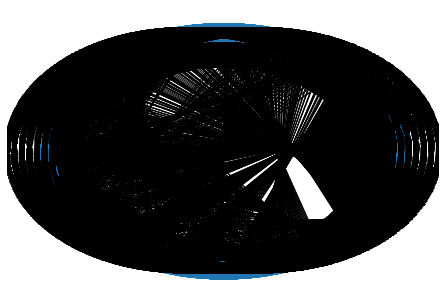

In [88]:
# Edgelist for unperturbed Async
edgelist_a = []
for seq in output_a:
  sequence = seq
  edgelist_a.append((''.join([str(st) for st in seq[0]]),
                   ''.join([str(st) for st in seq[1]])))
print(edgelist_a)
G_a = nx.DiGraph(edgelist_a)
#print(list(nx.simple_cycles(G)))
nx.draw_circular(G_a, with_labels=True)

In [68]:
# Limit Cycle Sync
def find_limit_cycle(G):
  limit_cycle_all = []
  #print(G)
  for i in range(len(G)):
    limit_cycle = []
    for j in edges_delete_all[i]:
      cycle = list(nx.simple_cycles(edges_delete_all[j]))
      limit_cycle.append(cycle)
    limit_cycle_all.append(limit_cycle)
  return limit_cycle_all

print(find_limit_cycle(G))
#print(len(find_limit_cycle(G)))

NameError: ignored

In [0]:
# Actual Limit Cycle Sync
def find_longer_list(G_a):
  limit_cycle = find_limit_cycle(G_a)
  long_limit_cycle = []
  for i in limit_cycle:
    if len(i) != 1:
      long_limit_cycle.append(i)
      return long_limit_cycle

print(find_longer_list(G_a))

None


In [0]:
# Self Cycles Sync
def find_self_cycle(G_a):
  self_cycle = []
  G_a = nx.DiGraph(edgelist_a)
  self_loop_edges = list(nx.selfloop_edges(G_a))
  state = [node[0] for node in self_loop_edges]
  return state

print(find_self_cycle(G_a))
print(len(find_self_cycle(G_a)))

['00000000000', '00000000011', '00000000100', '00000000111', '00000001001', '00000001011', '00000001101', '00000001111', '00000010000', '00000010011', '00000010100', '00000010111', '00000011001', '00000011011', '00000011101', '00000011111', '00000100000', '00000100011', '00000100100', '00000100111', '00000101001', '00000101011', '00000101101', '00000101111', '00000110000', '00000110011', '00000110100', '00000110111', '00000111001', '00000111011', '00000111101', '00000111111', '00001000000', '00001000011', '00001000100', '00001000111', '00001001001', '00001001011', '00001001101', '00001001111', '00001010000', '00001010011', '00001010100', '00001010111', '00001011001', '00001011011', '00001011101', '00001011111', '00001100000', '00001100011', '00001100100', '00001100111', '00001101001', '00001101011', '00001101101', '00001101111', '00001110000', '00001110011', '00001110100', '00001110111', '00001111001', '00001111011', '00001111101', '00001111111', '00010000000', '00010000011', '00010000

In [0]:
# Find steady states Sync
def find_steady_states(G):
  len_steady_states = []
  for i in range(len(G)):
    steady_states = []
    #G = nx.DiGraph(all_edges_delete[i])
    for node in G.nodes():
      if len(list(G.neighbors(node))) == 0 or (len(list(G.neighbors(node))) == 1 and (node in G.neighbors(node))):
        #print(node)
        steady_states.append(node)
      length = len(steady_states)
    len_steady_states.append(length)
  return len_steady_states

print(find_steady_states(G))
print(len(find_steady_states(G)))

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
29


In [165]:
# Find steady states Sync Perturbation
def find_steady_states(all_edges_add):
  len_steady_states = []
  for i in range(len(add)):
    steady_states = []
    G = nx.DiGraph(all_edges_add[i])
    for node in G.nodes():
      if len(list(G.neighbors(node))) == 0 or len(list(G.neighbors(node))) == 1 and (node in G.neighbors(node)):
        steady_states.append(node)
      length = len(steady_states)
    len_steady_states.append(length)
    #print(steady_states)
    #print(len(steady_states))
  return len_steady_states
  
print(find_steady_states(all_edges_add))
#print(len(find_steady_states(all_edges_add)))

# def find_steady_states(all_edges_delete):
#   len_steady_states = []
#   for i in range(len(delete)):
#     steady_states = []
#     G = nx.DiGraph(all_edges_delete[i])
#     for node in G.nodes():
#       if len(list(G.neighbors(node))) == 0 or len(list(G.neighbors(node))) == 1 and (node in G.neighbors(node)):
#         steady_states.append(node)
#       length = len(steady_states)
#     len_steady_states.append(length)
#     #print(steady_states)
#     #print(len(steady_states))
#   return len_steady_states
  
# print(find_steady_states(all_edges_delete))

# def find_steady_states(all_edges_reverse):
#   len_steady_states = []
#   for i in range(len(reverse)):
#     steady_states = []
#     G = nx.DiGraph(all_edges_reverse[i])
#     for node in G.nodes():
#       if len(list(G.neighbors(node))) == 0 or len(list(G.neighbors(node))) == 1 and (node in G.neighbors(node)):
#         steady_states.append(node)
#       length = len(steady_states)
#     len_steady_states.append(length)
#     #print(steady_states)
#     #print(len(steady_states))
#   return len_steady_states
  
# print(find_steady_states(all_edges_reverse))

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [169]:
def has_cell_cycle(G, G_a):
  has_cycle = []
  has_cycle_add = []
  has_cycle_delete = []
  has_cycle_reverse = []
  has_cycle_a = []
  cell_cycle = [('10001000100', '01101000100'), 
                ('01101000100', '01111000100'), 
                ('01111000100', '01110000000'), 
                ('01110000000', '01110001000'), 
                ('01110001000', '01110001011'), 
                ('01110001011', '00010011011'), 
                ('00010011011', '00000110011'), 
                ('00000110011', '00000110111'), 
                ('00000110111', '00000110101'),
                ('00000110101', '00001110100'), 
                ('00001110100', '00001100100'), 
                ('00001100100', '00001000100')]

 # Perturbed - add
  for i in range(len(all_edges_add)):
    G = nx.DiGraph(all_edges_add[i])
    for j in cell_cycle:
      if nx.has_path(G, j[0], j[1]):
        has_cycle_add.append(True)
      else:
        has_cycle_add.append(False)
  print(has_cycle_add)
  
 # Perturbed - delete
#   for i in range(len(all_edges_delete)):
#     G = nx.DiGraph(all_edges_delete[i])
#     for j in cell_cycle:
#       if nx.has_path(G, j[0], j[1]):
#         has_cycle_delete.append(True)
#       else:
#         has_cycle_delete.append(False)
#   print(has_cycle_delete)

 # Perturbed - reverse
#   for i in range(len(all_edges_reverse)):
#     G = nx.DiGraph(all_edges_reverse[i])
#     for j in cell_cycle:
#       if nx.has_path(G, j[0], j[1]):
#         has_cycle_reverse.append(True)
#       else:
#         has_cycle_reverse.append(False)
#   print(has_cycle_reverse)

# Unperturbed sync
  for i in cell_cycle:
    #print(i[0])
    if nx.has_path(G, i[0], i[1]):
      has_cycle.append(True)
    else:
      has_cycle.append(False)
  #shortest_path = nx.shortest_path(G, '10001000100', '00001000100')
  #print(len(shortest_path))
  print(has_cycle)
  
# Unperturbed async
  for i in cell_cycle:
    #print(i[0])
    if nx.has_path(G_a, i[0], i[1]):
      has_cycle_a.append(True)
    else:
      has_cycle_a.append(False)
  #shortest_path = nx.shortest_path(G, '10001000100', '00001000100')
  #print(len(shortest_path))
  print(has_cycle_a)  
    
  #shortest_path = nx.shortest_path(G_a, cell_cycle[0][0], cell_cycle[11][0])

print(has_cell_cycle(G, G_a))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [184]:
def cell_cycle_path(G_a):
  count = 0
  has_cycle_a = []
  cell_cycle = [('10001000100', '01101000100'), 
                ('01101000100', '01111000100'), 
                ('01111000100', '01110000000'), 
                ('01110000000', '01110001000'), 
                ('01110001000', '01110001011'), 
                ('01110001011', '00010011011'), 
                ('00010011011', '00000110011'), 
                ('00000110011', '00000110111'), 
                ('00000110111', '00000110101'),
                ('00000110101', '00001110100'), 
                ('00001110100', '00001100100'), 
                ('00001100100', '00001000100')]
  
  #for i in range(len(G_a)):
  paths = []
  if nx.has_path(G_a, '10001000100', '00001000100'):
    count += 1
    paths.append(count)
    new = nx.shortest_path(G_a, '10001000100', '00001000100')
    length = len(new)
  return [paths, length]

print(cell_cycle_path(G_a))

[[1], 2]


In [0]:
# Find basin size unperturbed network
def basin_size(G):
  nodes = G.nodes()
  count = 0
  all_states = all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  for i in range(len(all_states)):
    all_states[i] = ''.join(str(j) for j in all_states[i])
  for i in range(len(all_states)):
    if nx.has_path(G, all_states[i], '00001000100'):
      count += 1
  return count
  
print(basin_size(G))

1764


In [170]:
# Find basin size perturbed 
def basin_size_add(all_edges_add):
  all_basin_add = []
  all_states = all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  count = 0
  for i in range(len(add)):
    G = nx.DiGraph(all_edges_add[i])
    nodes = G.nodes()
    for j in range(len(all_states)):
      counts = []
      all_states[j] = ''.join(str(x) for x in all_states[i])
      #for k in range(len(all_states)):
      if nx.has_path(G, all_states[j], '00001000100'):
        count += 1
      counts.append(count)
    all_basin_add.append(count)
  return all_basin_add
  
print(basin_size_add(all_edges_add))
#print(len(basin_size_add(all_edges_add)))

# def basin_size_delete(all_edges_delete):
#   all_basin_delete = []
#   all_states = all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
#   count = 0
#   for i in range(len(delete)):
#     G = nx.DiGraph(all_edges_delete[i])
#     nodes = G.nodes()
#     for j in range(len(all_states)):
#       counts = []
#       all_states[j] = ''.join(str(x) for x in all_states[i])
#       #for k in range(len(all_states)):
#       if nx.has_path(G, all_states[j], '00001000100'):
#         count += 1
#       counts.append(count)
#     all_basin_delete.append(count)
#   return all_basin_delete
  
# print(basin_size_delete(all_edges_delete))
# #print(len(basin_size_delete(all_edges_delete)))

# def basin_size_reverse(all_edges_reverse):
#   all_basin_reverse = []
#   all_states = all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
#   count = 0
#   for i in range(len(reverse)):
#     G = nx.DiGraph(all_edges_reverse[i])
#     nodes = G.nodes()
#     for j in range(len(all_states)):
#       counts = []
#       all_states[j] = ''.join(str(x) for x in all_states[i])
#       #for k in range(len(all_states)):
#       if nx.has_path(G, all_states[j], '00001000100'):
#         count += 1
#       counts.append(count)
#     all_basin_reverse.append(count)
#   return all_basin_reverse
  
# print(basin_size_reverse(all_edges_reverse))
# #print(len(basin_size_reverse(all_edges_reverse)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [0]:
def create_txt_perturbation(out_delete, edges_delete_all):
  basin_sizes = basin_size()
  cell_cycle = has_cell_cycle()
  steady_states = find_steady_states(edges_delete_all)
  
  file_name = open('yeast_synchronous_perturbed_delete.txt', 'w+')
  file_name.write('Protein\tNew_Rule\tBasin_Size\tCell_Cycle_Present\tSteady_States\n')
  
  Protein = "{\"Action\": {'spec': {'protein': '%s'},"
  New_Rule = "{\"New_Rule\": {'spec': {'activ_inhib': '%s'},"
  Basin_Size = "\"Basin_Size\": {'spec': {'size': '%s'},"
  Cell_Cyle_Present = "\"Cell_Cycle_Present\": {'spec': {\"presence\": '%s'},"
  Steady_States = "\"Steady_States\": {'spec': {\"num_ss\": '%s'}}\n"
  
  
  for i in range(len(out_delete)):
    size = basin_sizes[out_delete.index(out_delete[i])]
    presence = cell_cycle[out_delete.index(out_delete[i])] 
    num_ss = steady_states[out_delete.index(out_delete[i])]

    
  
    #file_name.write("%s\t%s\t%s\t%s\t%s\t" % (out_delete[i][0], out_delete[i][1], size, presence, num_ss))
  file_name.close()
  
print(create_txt_perturbation(out_delete, edges_delete_all))

None


In [0]:
file_name = open('yeast_synchronous_perturbed_delete.txt', 'r+')
print(file_name.read())

Protein	New_Rule	Basin_Size	Cell_Cycle_Present	Steady_States



In [0]:
# import matplotlib.pyplot as plt
# def hist_perturb_add(G_add):  #??
#   #basin_change = (basin_size(G) - basin_size(G_add)) / (basin_size(G))
#   basin_change = (1764 - basin_size(G_add)) / 1764
#   num_bins = 11
#   plt.hist(basin_change, num_bins, alpha=0.5)
#   plt.title('')
#   plt.xlabel('Change in basin size')
#   plt.ylabel('Perturbation of edge addition')
#   plt.show()
  
# print(hist_perturb_add(G_add)) #??

In [0]:
# Histogram for perturb - add
import matplotlib.pyplot as plt
def hist_perturb_add(all_edges_add):
  basin_sizes = []
  for i in range(len(all_edges_add)):
    basin_size = basin_size_add(all_edges_add)[i]
    basin_change = (1764 - basin_size) / 1764
    basin_sizes.append(basin_change)
  #return basin_sizes
  num_bins = 11
  plt.hist(basin_sizes, num_bins, alpha=0.5)
  plt.title('Perturbation of edge addition')
  plt.xlabel('Relative change in basin size')
  plt.ylabel('')
  plt.show()
  
print(hist_perturb_add(all_edges_add))

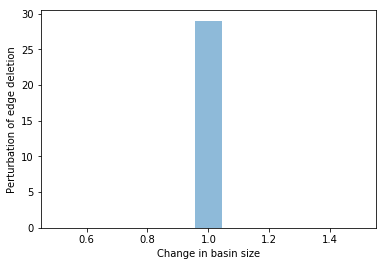

None


In [149]:
# Histogram for perturb - delete
import matplotlib.pyplot as plt
def hist_perturb_delete(all_edges_delete):
  basin_sizes = []
  for i in range(len(all_edges_delete)):
    #print(i)
    #G = nx.DiGraph(all_edges_delete[i])
    #print(basin_size_delete(all_edges_delete)[i])
    basin_size = basin_size_delete(all_edges_delete)[i]
    basin_change = (1764 - basin_size) / 1764
    basin_sizes.append(basin_change)
  #return basin_sizes
  num_bins = 11
  plt.hist(basin_sizes, num_bins, alpha=0.5)
  plt.title('Perturbation of edge deletion')
  plt.xlabel('Relative change in basin size')
  plt.ylabel('')
  plt.show()
  
print(hist_perturb_delete(all_edges_delete))

In [0]:
# Histogram for perturbed - reverse
import matplotlib.pyplot as plt
def hist_perturb_reverse(all_edges_reverse):
  basin_sizes = []
  for i in range(len(all_edges_reverse)):
    basin_size = basin_size_reverse(all_edges_reverse)[i]
    basin_change = (1764 - basin_size) / 1764
    basin_sizes.append(basin_change)
  #return basin_sizes
  num_bins = 11
  plt.hist(basin_sizes, num_bins, alpha=0.5)
  plt.title('Perturbation of edge reverse')
  plt.xlabel('Relative change in basin size')
  plt.ylabel('')
  plt.show()
  
print(hist_perturb_reverse(all_edges_reverse))

In [0]:
# Graphspace Synchronous
def graphspace_synchronous(edgelist_add, G_add):
  nodes = G_add.nodes()
  edges = G_add.edges()
  limit_cycle = find_longer_list(G_add)
  steady_states = find_steady_states(G_add)
  #random_walk = individual_random_walk(nodes)
  #edges_count = count_edges(G)
  #scaled_edges = max_count_edges(G)
  #nodes_count = count_nodes(G)
  #scaled_nodes = max_count_nodes(G)
  
  file_name = open('yeast_synchronous_add.txt', 'w+')
  file_name.write('head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n')

  head = "{\"head\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  tail = "\"tail\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  edge = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"color\": '%s'}, \"id\": '%s-%s'}}\n"

  style = head + tail + edge 

  for i in range(0, len(edgelist_add)):
    if limit_cycle != None:
      if edgelist_add[i][0] in limit_cycle:
        edge_color = 'blue'
      else:
        edge_color = 'grey'
    else:
      edge_color = 'grey'
    
    if edgelist_add[i][0] in steady_states:
      shape1 = 'rectangle'
      color1 = 'red'
      edge_color = 'grey'
    else:
      shape1 = 'ellipse'
      color1 = 'grey'
      edge_color = 'grey'
    
    if edgelist_add[i][1] in steady_states:
      shape2 = 'rectangle'
      color2 = 'red'
    else:
      shape2 = 'ellipse'
      color2 = 'grey'   
      
#     if edgelist[i] in scaled_edges.keys():
#       if scaled_edges[edgelist[i]] == 0.0:
#         edge_width = 1.0
#       else:
#         edge_width = scaled_edges[edgelist[i]]
      
#     if edgelist[i][0] in scaled_nodes.keys():
#       if scaled_nodes[edgelist[i][0]] == 0.0:
#         opacity1 = 0.25
#       else:
#         opacity1 = scaled_nodes[edgelist[i][0]]

#     if edgelist[i][1] in scaled_nodes.keys():
#       if scaled_nodes[edgelist[i][1]] == 0.0:
#         opacity2 = 0.25
#       else:
#         opacity2 = scaled_nodes[edgelist[i][1]]
     
      
    file_name.write("%s\t%s\t%s\t%s\t-\t" % (edgelist_add[i][0], edgelist_add[i][1], edgelist_add[i][0], edgelist_add[i][1]))
#     file_name.write(style % (shape1, color1, opacity1, edgelist[i][0], shape2, color2, opacity2, edgelist[i][1], 
#                              edge_color, edge_width, edgelist[i][0], edgelist[i][1]))
    file_name.write(style % (shape1, color1, edgelist_add[i][0], shape2, color2, edgelist_add[i][1],
                              edge_color, edgelist_add[i][0], edgelist_add[i][1]))
    
  file_name.close()   
print(graphspace_synchronous(edgelist_add, G_add))

None


In [0]:
file_name = open('yeast_synchronous_add.txt', 'r+')
print(file_name.read())

head	tail	head_label	tail_label	edge_popup	style
00000000000	00000000000	00000000000	00000000000	-	{"head": {'spec': {'shape': 'rectangle','color': 'red','border': "black"}, "id": '00000000000'},"tail": {'spec': {'shape': 'rectangle','color': 'red','border': "black"}, "id": '00000000000'},"edge": {'spec': {"target-arrow-shape": 'triangle', "color": 'grey'}, "id": '00000000000-00000000000'}}
00000000001	00000000000	00000000001	00000000000	-	{"head": {'spec': {'shape': 'ellipse','color': 'grey','border': "black"}, "id": '00000000001'},"tail": {'spec': {'shape': 'rectangle','color': 'red','border': "black"}, "id": '00000000000'},"edge": {'spec': {"target-arrow-shape": 'triangle', "color": 'grey'}, "id": '00000000001-00000000000'}}
00000000010	00000000000	00000000010	00000000000	-	{"head": {'spec': {'shape': 'ellipse','color': 'grey','border': "black"}, "id": '00000000010'},"tail": {'spec': {'shape': 'rectangle','color': 'red','border': "black"}, "id": '00000000000'},"edge": {'spec': {"tar